# Import Moduals

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import NeuralNetwork

from keras.utils import to_categorical
from keras.metrics import CategoricalAccuracy
from keras.losses import MeanSquaredError

from importlib import reload

metrics = CategoricalAccuracy()

# Preprocessing

In [2]:
# import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
# network parameters
batch_size = 128
hidden_units = 128

# Keras' Model

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, use_bias=False))
#model.add(Dropout(0.45))
model.add(Dense(hidden_units, use_bias=False))
#model.add(Dropout(0.45))
model.add(Dense(num_labels, use_bias=False))
model.compile(loss=MeanSquaredError(), 
              optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.5426
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.7344
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0560 - accuracy: 0.7764
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.7976
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.8082
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.8164
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.8219
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0470 - accuracy: 0.8262
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.8293
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.8317

In [77]:
y_hat = model.predict(x_test)
metrics.update_state(y_test, y_hat)
metrics.result().numpy()

313/313 [==============================] - 0s 936us/step


0.84243333

# My Model

In [3]:
# The function can fit a model and return accuracy of test data
def f(x_train, y_train, x_test, y_test, model, batch_size, epoches, progress = True):
    metrics = CategoricalAccuracy()
    model.fit(x_train, y_train, 0.01, epoches = epoches, batch_size = batch_size, progress = progress)
    y_hat = model.predict(x_test)
    metrics.reset_state()
    metrics.update_state(y_test, y_hat)
    model.reset()
    return metrics.result().numpy()

In [4]:
reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer
# Fitting parameters
batch_size = 128
hidden_units = 128
epoches = 5
# Standard Deep Neural Network
m = MyModel()
m.addLayer(MyLayer(input_size, hidden_units, dropout = True, dropout_probability = 0.75))
m.addLayer(MyLayer(hidden_units, num_labels))
# Deep Neural Network with LSH dropout
lshm = MyModel()
lshm.addLayer(MyLayer(input_size, hidden_units, dropout_lsh = True, function_num=2))
lshm.addLayer(MyLayer(hidden_units, num_labels))

In [14]:
# standard dropout
print("Standard dropout")
print("Accuracy: " + str(f(x_train, y_train, x_test, y_test, m, batch_size, epoches = epoches, progress = True)))
# LSH dropout
print("\nLSH dropout")
print("Accuracy: " + str(f(x_train, y_train, x_test, y_test, lshm, batch_size, epoches = epoches, progress = True)))

Standard dropout


Epoch  1: 100% |██████████| 469/469, Accuracy: 0.2057, Loss: 0.3338;
Epoch  2: 100% |██████████| 469/469, Accuracy: 0.3158, Loss: 0.1858;
Epoch  3: 100% |██████████| 469/469, Accuracy: 0.3899, Loss: 0.1868;
Epoch  4: 100% |██████████| 469/469, Accuracy: 0.4469, Loss: 0.1358;
Epoch  5: 100% |██████████| 469/469, Accuracy: 0.4920, Loss: 0.1124;


Accuracy: 0.804

LSH dropout


Epoch  1: 100% |██████████| 469/469, Accuracy: 0.2772, Loss: 0.1900;
Epoch  2: 100% |██████████| 469/469, Accuracy: 0.4199, Loss: 0.1546;
Epoch  3: 100% |██████████| 469/469, Accuracy: 0.4935, Loss: 0.1190;
Epoch  4: 100% |██████████| 469/469, Accuracy: 0.5451, Loss: 0.1138;
Epoch  5: 100% |██████████| 469/469, Accuracy: 0.5817, Loss: 0.1079;


Accuracy: 0.8012


In [15]:
accuracy = [f(x_train, y_train, x_test, y_test, m, batch_size, epoches = epoches, progress = False) for i in range(100)]

In [16]:
accuracy_lsh = [f(x_train, y_train, x_test, y_test, lshm, batch_size, epoches = epoches, progress = False) for i in range(100)]

In [17]:
print(np.mean(accuracy))
print(np.mean(accuracy_lsh))

0.80200297
0.79982597


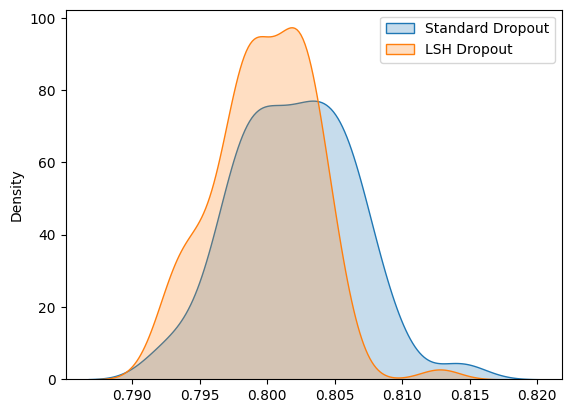

In [18]:
sns.kdeplot(accuracy, fill=True, label="Standard Dropout")
sns.kdeplot(accuracy_lsh, fill=True, label="LSH Dropout")
plt.legend()
plt.show()